In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.colors as mcolors

In [2]:
from plot_config import *

In [3]:
# plt.imshow(to_anim['A'][50,10].T)

In [4]:
# plt.imshow(to_anim['F'][30,10].T)

In [5]:
from matplotlib.animation import FuncAnimation

In [6]:
extra_text = 'The spread are enhanced 10 times'
just_for_time = '/sciserver/filedb10-01/ocean/wenrui_temp/vol_budget'
rtime = np.array(xr.open_zarr(just_for_time).time)
case = 'fresh'
duration = 'five'
save_as = 'talkfig1(b)1.png'
pre = 'lineplotprep/'+case+'_'
time_slice = slice(1824,None,-1)
str_slc = str(time_slice)

TOTAL_VOLUME,NUMBER_OF_PARTICLE,VOLUME_EACH,idate = TOTAL_VOLUME_fresh,NUMBER_OF_PARTICLE_fresh,VOLUME_EACH_fresh,fresh_idate
mean = xr.open_zarr(pre+'mean'+str_slc)
std = xr.open_zarr(pre+'std'+str_slc)
xtime = rtime[idate:idate-len(mean.time):-1]
mean['tot'] = (mean['A']+mean['e_ua']+mean['E']+mean['dif_h']+mean['dif_v']+mean['I']+mean['F'])
offset = float(mean['sf'][0])
salt = np.diff(np.array([0]+list(mean['sl'].data)))
to_explain = salt - offset
error = to_explain + mean['tot']
sal_color = fresh_theme_color

In [7]:
xg = np.load('plotting_xg.npy')
yg = np.load('plotting_yg.npy')

vmax = 5

In [8]:
to_anim = xr.open_zarr('/sciserver/filedb04-01/ocean/wenrui_temp/particle_file/freshM/maps_animate')

def days_apart(a,b):
    return int((a-b)/np.timedelta64(1,'D'))
t0 = np.datetime64('2016-06-01')
dt = []
for yr in range(2011,2017):
    for mt in range(1,13):
        b = np.datetime64(f'{yr}-{mt:02}-01')
        dt.append(days_apart(t0,b))
dt = np.array(dt[5:66][::-1]).astype(int)
steps = np.round((dt[1:]+dt[:-1])/2)

delta_t = xr.DataArray(np.diff(dt),dims = 'time')

to_anim /= delta_t

In [9]:
from matplotlib.dates import date2num, num2date
itmax = fresh_idate
salt_path = '/export/scratch/wjiang33/cooked/centerS_normalNmean/'
particle_path = '/sciserver/filedb04-01/ocean/wenrui_temp/particle_file/freshM/table'
ds = xr.open_zarr(salt_path)
times = np.array(rtime[itmax:itmax-3650:-1])
spds = date2num(times)
tb = xr.open_zarr(particle_path)
lons = np.load('lineplotprep/fresh_lon.npy')
lats = np.load('lineplotprep/fresh_lat.npy')
xx, yy, _ = projection.transform_points(ccrs.PlateCarree(), lons, lats).T

xx = xx.T
yy = yy.T

norm = plt.Normalize(np.min(spds), np.max(spds))

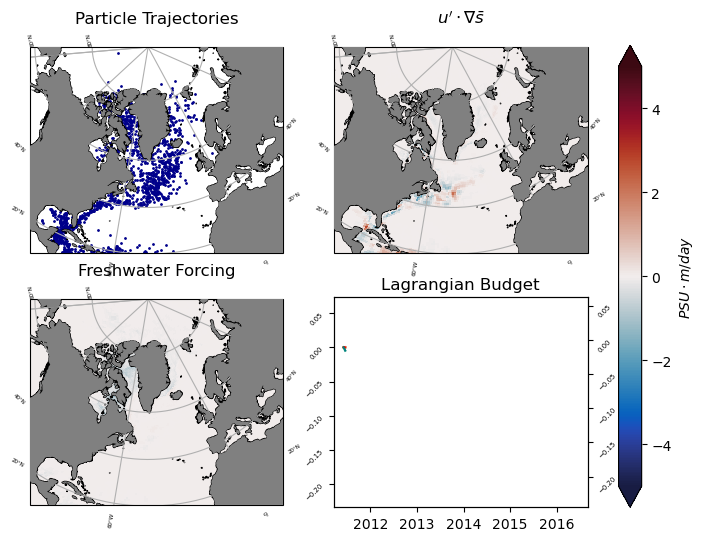

In [10]:
mi = 10
bi = int(steps[mi])
fi = 1826-bi
fig = plt.figure(figsize = (8,6))
plt.clf()

ax0 = plt.subplot(2,2,1,projection = projection)
sc = ax0.scatter(xx[bi],yy[bi],s = 1,color = 'darkblue')
ax0.set_title('Particle Trajectories')

ax1 = plt.subplot(2,2,2,projection = projection)
# p1s = []
# for i in [1,2,6,7,10,11]:
#     p1 = ax1.pcolormesh(xg[i] ,yg[i] ,to_anim['A'][mi][i] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree())
#     p1s.append(p1)
p11 = ax1.pcolormesh(xg[1], yg[1], -to_anim['A'][mi][1], vmax=vmax, vmin=-vmax, cmap=balance, transform=ccrs.PlateCarree())
p12 = ax1.pcolormesh(xg[2], yg[2], -to_anim['A'][mi][2], vmax=vmax, vmin=-vmax, cmap=balance, transform=ccrs.PlateCarree())
p16 = ax1.pcolormesh(xg[6], yg[6], -to_anim['A'][mi][6], vmax=vmax, vmin=-vmax, cmap=balance, transform=ccrs.PlateCarree())
p17 = ax1.pcolormesh(xg[7], yg[7], -to_anim['A'][mi][7], vmax=vmax, vmin=-vmax, cmap=balance, transform=ccrs.PlateCarree())
p110 = ax1.pcolormesh(xg[10], yg[10], -to_anim['A'][mi][10], vmax=vmax, vmin=-vmax, cmap=balance, transform=ccrs.PlateCarree())
p111 = ax1.pcolormesh(xg[11], yg[11], -to_anim['A'][mi][11], vmax=vmax, vmin=-vmax, cmap=balance, transform=ccrs.PlateCarree())
ax1.set_title(r"$u'\cdot \nabla \bar s$")

ax2 = plt.subplot(2,2,3,projection = projection)
# p2s = []
# for i in [1,2,6,7,10,11]:
#     p2 = ax2.pcolormesh(xg[i] ,yg[i] ,to_anim['F'][mi][i] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree())
#     p2s.append(p2)
p21 = ax2.pcolormesh(xg[1], yg[1], -to_anim['F'][mi][1], vmax=vmax, vmin=-vmax, cmap=balance, transform=ccrs.PlateCarree())
p22 = ax2.pcolormesh(xg[2], yg[2], -to_anim['F'][mi][2], vmax=vmax, vmin=-vmax, cmap=balance, transform=ccrs.PlateCarree())
p26 = ax2.pcolormesh(xg[6], yg[6], -to_anim['F'][mi][6], vmax=vmax, vmin=-vmax, cmap=balance, transform=ccrs.PlateCarree())
p27 = ax2.pcolormesh(xg[7], yg[7], -to_anim['F'][mi][7], vmax=vmax, vmin=-vmax, cmap=balance, transform=ccrs.PlateCarree())
p210 = ax2.pcolormesh(xg[10], yg[10], -to_anim['F'][mi][10], vmax=vmax, vmin=-vmax, cmap=balance, transform=ccrs.PlateCarree())
p211 = ax2.pcolormesh(xg[11], yg[11], -to_anim['F'][mi][11], vmax=vmax, vmin=-vmax, cmap=balance, transform=ccrs.PlateCarree())
ax2.set_title("Freshwater Forcing")

ax3 = plt.subplot(2,2,4)
lins = []
sprs = []
for var in rhs_list:
    a_mean = -mean[var]
    a_std = 10*std[var]/np.sqrt(NUMBER_OF_PARTICLE-1)
    mean_line, = ax3.plot(xtime[::-1][:fi], a_mean[:fi], label=case_term_dic[var], color=color_dic[var])
    lins.append(mean_line)
erro_line, = ax3.plot(xtime[::-1][:fi], error[:fi], color=error_color)
salt_line, = ax3.plot(xtime[::-1][:fi], salt[:fi]-offset,color = sal_color)
lins.append(erro_line)
lins.append(salt_line)
ax3.set_ylim(-0.23372146958145434, 0.07313628676661814)
ax3.set_xlim(15054.05, 17043.95)
plt.yticks(fontsize=5,rotation = 45)
axt = ax3.twinx()
axt.set_ylim(ax3.get_ylim()[0] + offset, ax3.get_ylim()[1] + offset)
plt.yticks(fontsize=5,rotation = 45)
ax3.set_title("Lagrangian Budget")

for axs in [ax0,ax1,ax2]:
    axs.coastlines(color = 'k',resolution = '50m')
    axs.add_feature(cfeature.LAND,facecolor = 'grey',zorder = 10)
    axs.set_extent(extent)
    gl = axs.gridlines(draw_labels=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.xlabel_style = {'size': 4}
    gl.ylabel_style = {'size': 4} 

# for ii,fc in enumerate([2,10]):
#     p1s[ii].set_array(np.array(to_anim['A'][mi][ii]).ravel())
#     p2s[ii].set_array(np.array(to_anim['F'][mi][ii]).ravel())

fig.colorbar(p22,ax=[ax0,ax1,ax2,ax3], orientation='vertical', fraction=0.05,extend = 'both',label = r'$PSU\cdot m /day$')


def update(frame):
    mi = frame
    bi = int(steps[mi])
    fi = 1826-bi
    # Update line plot
    for i,var in enumerate(rhs_list):
        a_mean = -mean[var]
        line = lins[i]
        line.set_data(xtime[::-1][:fi], a_mean[:fi])
    lins[-2].set_data(xtime[::-1][:fi], error[:fi])
    lins[-1].set_data(xtime[::-1][:fi], salt[:fi]-offset)
    
    # Update scatter plot
    sc.set_offsets(np.vstack((xx[bi],yy[bi])).T)
    
    p11.set_array(np.array(-to_anim['A'][mi][1]).ravel())
    p12.set_array(np.array(-to_anim['A'][mi][2]).ravel())
    p16.set_array(np.array(-to_anim['A'][mi][6]).ravel())
    p17.set_array(np.array(-to_anim['A'][mi][7]).ravel())
    p110.set_array(np.array(-to_anim['A'][mi][10]).ravel())
    p111.set_array(np.array(-to_anim['A'][mi][11]).ravel())
    p21.set_array(np.array(-to_anim['F'][mi][1]).ravel())
    p22.set_array(np.array(-to_anim['F'][mi][2]).ravel())
    p26.set_array(np.array(-to_anim['F'][mi][6]).ravel())
    p27.set_array(np.array(-to_anim['F'][mi][7]).ravel())
    p210.set_array(np.array(-to_anim['F'][mi][10]).ravel())
    p211.set_array(np.array(-to_anim['F'][mi][11]).ravel())
    
    return *lins,sc,p11,p12,p16,p17,p110,p111,p21,p22,p26,p27,p210,p211

ani = FuncAnimation(fig, update, frames=range(59,-1,-1), blit=True)

In [11]:
# from IPython.display import HTML, display
# display(HTML(ani.to_jshtml()))

In [13]:
ani.save('poster_anim.mp4')